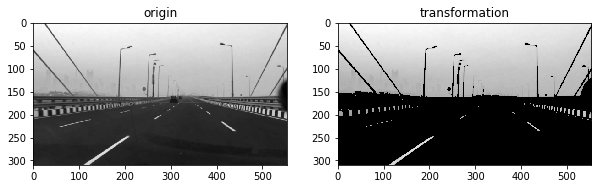

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = os.listdir('lane/')
image = cv2.imread('lane/'+img_path[0]) 
mark = np.copy(image)

b_th = 200
g_th = 200
r_th = 200
bgr_th = [b_th, g_th, r_th]
thresholds = (image[:,:,0]<150) | (image[:,:,1]<150) | (image[:,:,2]<150)
mark[thresholds] = [0,0,0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=((10,10)))
ax[0].set_title('origin')
ax[0].imshow(image)
ax[1].set_title('transformation')
ax[1].imshow(mark)
plt.show()

In [46]:
image = cv2.imread('lane/'+os.listdir('./lane')[0])
height, width = image.shape[:2]
#vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
vertices = np.array([[100,300], [280,180], [380,180], [540,300]])
roi_img = region_of_interest(image, vertices)
mark = np.copy(roi_img)
mark = mark_img(roi_img)

In [60]:
def img_show(origin, transform):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=((10,10)))
    ax[0].set_title('origin')
    ax[0].imshow(origin, cmap='gray')
    ax[1].set_title('transformation')
    ax[1].imshow(transform, cmap='gray')
    plt.show()

def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
def canny(img, low, high):
    return cv2.Canny(img, low, high)
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size,kernel_size),0)

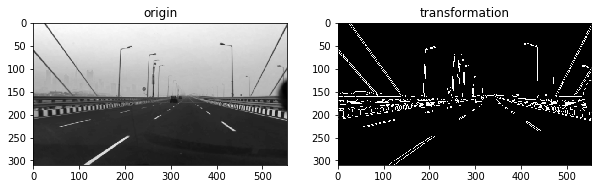

In [59]:
gray_img = grayscale(image)
blur_img = gaussian_blur(gray_img)
canny_img = canny(gray_img, 70, 210)

img_show(gray_img, canny_img)